In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from pandas import *
from pandas_datareader import data as pdr
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

In [123]:
# Tickers
tickers = ['^GSPC', '^VIX', '^TNX', 'EURUSD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'GBPUSD=X']

# dates rolling
start_date = ['2009-1-1','2010-1-1','2011-1-1','2012-1-1','2013-1-1','2014-1-1','2015-1-1','2016-1-1']
train_end = ['2011-12-31','2012-12-31','2013-12-31','2014-12-31','2015-12-31','2016-12-31','2017-12-31','2018-12-31']
test_start = ['2012-1-1','2013-1-1','2014-1-1','2015-1-1','2016-1-1','2017-1-1','2018-1-1','2019-1-1']
end_date = ['2012-12-31','2013-12-31','2014-12-31','2015-12-31','2016-12-31','2017-12-31','2018-12-31','2019-12-31']

datasets_train = []
datasets_test = []
mu_train_lst = np.zeros((len(tickers), len(start_date)))
sigma_train_lst = np.zeros((len(tickers), len(start_date)))
i = 0

for st, te, ts, ed in zip(start_date,train_end,test_start,end_date):
    
    # data Close
    data_close = pdr.get_data_yahoo(tickers, start=st, end=ed)['Adj Close']
    
    # data returns
    data = data_close.shift(1) / data_close - 1

    # Sets
    data_train = data[st:te].dropna()
    data_test = data[ts:ed].dropna()

    # mu sigma train
    mu_train = data_train.mean()
    sigma_train = data_train.std()

    # Final sets
    data_train_prod = (data_train - mu_train) / sigma_train
    data_test_prod = (data_test - mu_train) / sigma_train

    datasets_train.append(data_train_prod)
    datasets_test.append(data_test_prod)
    sigma_train_lst[i] = sigma_train
    mu_train_lst[i] = mu_train
    i += 1
    

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed


In [1]:
display(datasets_train[1])
display(datasets_test[1])

NameError: name 'datasets_train' is not defined

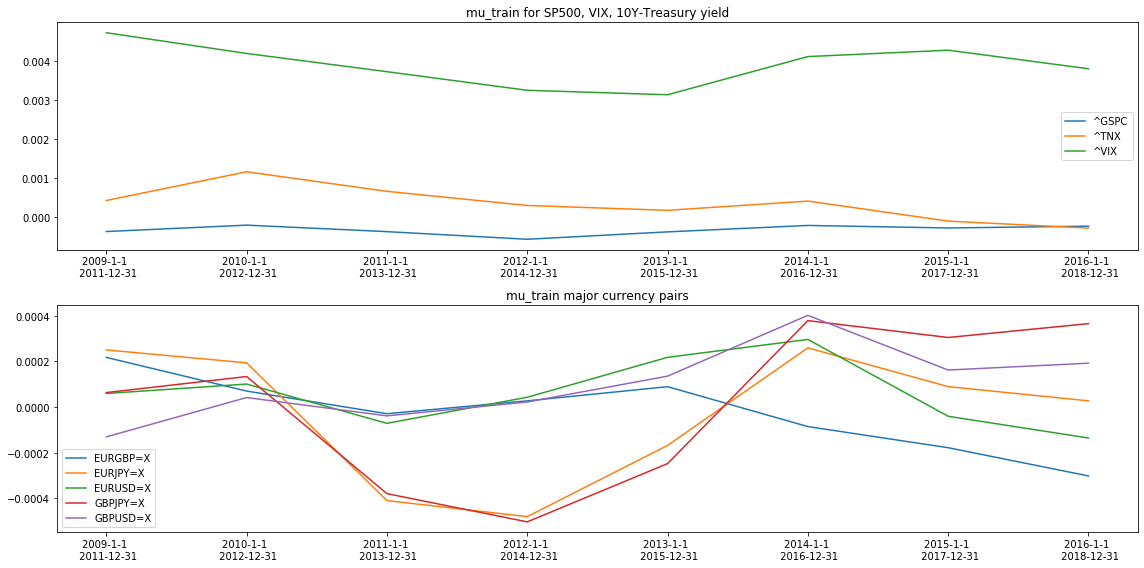

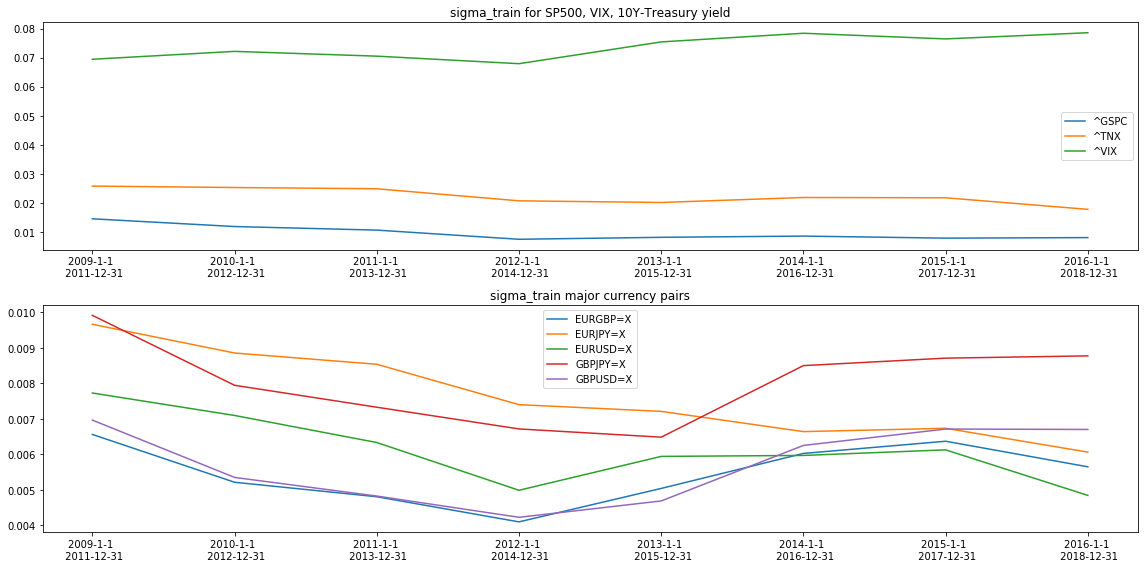

In [124]:
# Training dates
x_train_dates = []
for star, endd in zip(start_date, train_end):
    per = star + ' \n ' + endd
    x_train_dates.append(per)
x_train_dates = np.array(x_train_dates)


# Plots
# Mu train
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
st = axes[0].plot(mu_train_lst[:,-3:])
cur = axes[1].plot(mu_train_lst[:,:-3])
axes[0].legend(st, datasets_train[0].columns.values[-3:], loc='best')
axes[1].legend(cur, datasets_train[0].columns.values[:-3], loc='best')
axes[0].set_title('mu_train for SP500, VIX, 10Y-Treasury yield')
axes[1].set_title('mu_train major currency pairs')
for ax in axes:
    ax.set_xticks(range(len(x_train_dates)))
    ax.set_xticklabels(x_train_dates)
fig.tight_layout()
fig.show()


# Sigma train
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
st = axes[0].plot(sigma_train_lst[:,-3:])
cur = axes[1].plot(sigma_train_lst[:,:-3])
axes[0].legend(st, datasets_train[0].columns.values[-3:], loc='best')
axes[1].legend(cur, datasets_train[0].columns.values[:-3], loc='best')
axes[0].set_title('sigma_train for SP500, VIX, 10Y-Treasury yield')
axes[1].set_title('sigma_train major currency pairs')
for ax in axes:
    ax.set_xticks(range(len(x_train_dates)))
    ax.set_xticklabels(x_train_dates)
fig.tight_layout()
fig.show()